In [ ]:
# Weights and biases
# !pip install wandb -qqq
# import wandb

     |████████████████████████████████| 1.8 MB 33.5 MB/s 
     |████████████████████████████████| 181 kB 58.1 MB/s 
     |████████████████████████████████| 145 kB 70.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [ ]:
# Login into the account
# wandb.login()

# Play with every model, parameter and the following dataset - thrice 

In [1]:
# Python3 program introducing f-string. F-strings are cooler
val = 'DSA'
print(f"{val}for{val} is a portal for learning {val}.")
 
 
name = 'Sagar'
age = 22
print(f"Hello, My name is {name} and I'm {age} years old.")

# Importing datetime
import datetime
today = datetime.datetime.today()
print(f"{today: %B %d, %Y}")

DSAforDSA is a portal for learning DSA.
Hello, My name is Sagar and I'm 22 years old.
 June 17, 2022


In [ ]:
print(today)

2022-06-13 18:01:45.834234


In [3]:
# Importing the requisite libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Import Pytorch. Study all of these four modules extensively 
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms

In [4]:
# Random initialization 
# High bias refers to high error on training set. High variance refers to high error on test set
x=torch.rand(2, 2)
y=torch.rand(2, 2)

z=x*y
z=torch.div(x, y)
print(z)
print()

x=torch.rand(4, 4)
print(x)
y=x.view(-1, 8) 
print(y.size())
print()

a=torch.ones(5)
print(a)
b=a.numpy()
print(b)
print()

# Adding 1 to the initial tensor will modify the derived tensor or numpy array as well.
a.add_(1)
print(b)

tensor([[1.5013, 1.7906],
        [0.3806, 0.6719]])

tensor([[0.8853, 0.7091, 0.4316, 0.5594],
        [0.9416, 0.1178, 0.3512, 0.4684],
        [0.4643, 0.1076, 0.3908, 0.9738],
        [0.2501, 0.2615, 0.8101, 0.2507]])
torch.Size([2, 8])

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]

[2. 2. 2. 2. 2.]


In [ ]:
# Check for GPU availibility 
if torch.cuda.is_available():
  device=torch.device("cuda")
  x=torch.ones(5, device=device)
  y=torch.ones(5, device=device)
  z=x+y
  z=z.to("cpu")
  print(z)

tensor([2., 2., 2., 2., 2.])


# Autograd Package for Gradient Computation


In [ ]:
# When writing requires_grad=True, we explicitly specify that gradient computations can occur WRT this variable. Enable gradient computations WRT this variable
x=torch.randn(3, requires_grad=True)
print(x)
y=x+2
print(y)

tensor([ 0.9401,  0.0035, -1.0927], requires_grad=True)
tensor([2.9401, 2.0035, 0.9073], grad_fn=<AddBackward0>)


In [ ]:
z=y*y*2
v=torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32) 
z.backward(v) # Computes dz/dx at this particular value
print(x.grad)

tensor([1.1760e+00, 8.0141e+00, 3.6293e-03])


In [ ]:
#Following are the three ways to initialize a vector without enabling gradient computation
# x.requires_grad_(false)
# x.detach()
# with torch.no_grad():
#   loop
x1=torch.randn(3, requires_grad=False) 


#Understand how this is working
weights=torch.ones(4, requires_grad=True)
for epoch in range(3):
  model_output=(weights*3).sum()

  # Compute Gradient and print the output 
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [ ]:
# Basic forward and backward pass
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0)

# Loss is calculated WRT weights
w = torch.tensor(1.0)

# Forward pass and loss computation
y_hat = w*x
loss = (y_hat-y)**2
print(loss)

# Backward loss
loss.backward()
print(x.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Linear Regression with Gradient Computation in PyTorch - Part A

In [ ]:
# Update weights
# Prediction, gradient computation, loss computation and parameter updates
# Gradients and torch

# Training samples
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# Model prediction
def forward(x):
  return w*x

# Loss = MSE
def loss(y, y_predicted):
  return((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y) ** 2
# dJ/dW = 1/N * 2 * (w* x -y)

def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted - y).mean()

print(forward(5.0))

#Training
learning_rate = 0.01
n_iters = 25

for epoch in range(n_iters):

  # Prediction = forward pass
  y_preds = forward(X)

  # Calculate loss
  l = loss(Y, y_preds)

  # Gradient computation
  dw = gradient(X, Y, y_preds)

  # Update weights
  w -= learning_rate * dw

  if epoch % 5 == 0:
    print("Weights={}".format(w), "Loss={}".format(l))


0.0
Weights=1.2 Loss=30.0
Weights=1.9918080282211301 Loss=0.0031457357108592987
Weights=1.9999160599708554 Loss=3.297340072094812e-07
Weights=1.9999991369247434 Loss=3.531397396727698e-11
Weights=1.9999999952316283 Loss=0.0


## Linear Regression with Gradient Computation in PyTorch - Part B

In [ ]:
# Training samples. This is the general training pipeline in PyTorch. Still a manual process
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

for epoch in range(1000):
  y_pred = forward(x)

  # Loss
  l = loss(Y, y_pred)

  # Gradients = Backward pass. Calculates dw and dJ/dw internally
  l.backward()

  # Update weights. Autogradient computation:
  with torch.no_grad():
    w -= learning_rate * w.grad

  if epoch % 100==0:
    print("Weights={}".format(w), "Loss={}".format(l))

  # Zero gradient
  w.grad.zero_()

Weights=0.09999999403953552 Loss=30.0
Weights=4.350164413452148 Loss=5.439698219299316
Weights=4.913819789886475 Loss=5.007733345031738
Weights=4.988570690155029 Loss=5.000136375427246
Weights=4.998484134674072 Loss=5.000002861022949
Weights=4.9997992515563965 Loss=5.0
Weights=4.999971866607666 Loss=5.0
Weights=4.999988555908203 Loss=5.0
Weights=4.999988555908203 Loss=5.0
Weights=4.999988555908203 Loss=5.0


## Loss Computation and PyTorch training pipeline

In [ ]:
# Design model (input, output size and forward pass)
# Construct loss and optmizer
# Design model (input, output size and forward pass)
# Training loop - compute predictions, backward pass: gradients and update weights

# Training samples. This is the general training pipeline in PyTorch
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5)" = {model(X_test).item():.3f}')

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


for epoch in range(1000):

  # Zero gradient. Setting dw, db and dZ to 0
  optimizer.zero_grad()
  y_pred = model(X)

  # Loss
  loss = nn.MSELoss()
  optimizer = torch.optim.SGD([w], lr = learning_rate)

  # Calculating loss
  l = loss(Y, y_pred)

  # Gradients = Backward pass. Calculates dw and dJ/dw internally
  l.backward()

  # Update weights. Autogradient computation:
  optimizer.step()

  if epoch % 200 == 0:
    print("Weights={}".format(w), "Loss={}".format(l)

print(f'Prediction after training: f(5)" = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5)" = 0.294
Weights=0.0 Loss=30.821449279785156
Weights=0.0 Loss=30.821449279785156
Weights=0.0 Loss=30.821449279785156
Weights=0.0 Loss=30.821449279785156
Weights=0.0 Loss=30.821449279785156
Prediction after training: f(5)" = 0.294


## OOPs method - Preferred Method

In [ ]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):

    # Import all the parameters from the main class
    super(LinearRegression, self).__init__()

    # Define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)


print(f'Prediction before training: f(5)" = {model(X_test).item():.3f}')

#Training
learning_rate = 0.01

w = torch.tensor(0.02, dtype=torch.float32, requires_grad=True)

for epoch in range(100):
  y_pred = model(X)

  # Loss
  loss = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  # Calculating loss
  l = loss(Y, y_pred)

  # Gradients = Backward pass. Calculates dw and dJ/dw internally. Autograd. Computes x.grad += dLoss/dx
  l.backward()

  # Update weights smoothened by softmax. Computes x += -lr * x.grad
  optimizer.step()

  if epoch % 200 == 0:
    print("Weights={}".format(w), "Loss={}".format(l))

  # Zero gradient
  optimizer.zero_grad()

  if epoch % 200 == 0:
    print("Weights={}".format(w), "Loss={}".format(l))


print(f'Prediction after training: f(5)" = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5)" = 1.320
Weights=0.019999999552965164 Loss=19.759254455566406
Weights=0.019999999552965164 Loss=19.759254455566406
Prediction after training: f(5)" = 9.285


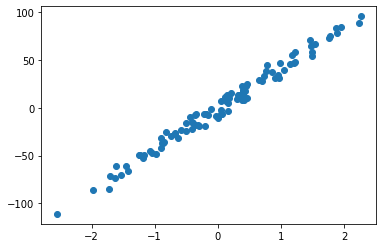

In [ ]:
# Design model. (input, output size, forward pass)
# Construct loss and optimizer
# Training loops
  # forward pass: compute prediction and loss
  # backward pass: gradients
  # update weights
from sklearn import datasets
import matplotlib.pyplot as plt

# Prepare data
# Adjust the linearity of the model with the help of noise parameter
X_numpy, Y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 5, random_state = 0)
plt.scatter(X_numpy, Y_numpy)
plt.show()

In [ ]:
# Convert both the feature and label matrix to torch tensors. Preparing the data
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# Defining the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# Loss and optimizer
learning_rate = 0.02
num_epochs = 1000
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
                            
# Train the model
for epoch in range(num_epochs):

  # Convert numpy arrays to torch tensors
  preds = model(X)
  loss = criterion(preds, Y)

  # Backward and optimize 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 100 == 0:
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    # Think about the type of loss next time onwards

Epoch [100/1000], Loss: 29.0760
Epoch [200/1000], Loss: 28.5431
Epoch [300/1000], Loss: 28.5429
Epoch [400/1000], Loss: 28.5429
Epoch [500/1000], Loss: 28.5429
Epoch [600/1000], Loss: 28.5429
Epoch [700/1000], Loss: 28.5429
Epoch [800/1000], Loss: 28.5429
Epoch [900/1000], Loss: 28.5429
Epoch [1000/1000], Loss: 28.5429


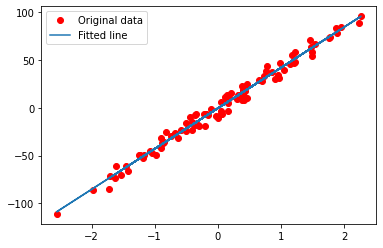

In [ ]:
# Plot the graph
predicted = model(torch.from_numpy(X_numpy.astype(np.float32))).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

# Custom Dataset - Tabular Form - without inheriting from PyTorch Dataset class

In [ ]:
class CustomDataset:
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    current_sample = self.data[idx, :]
    current_target = self.targets[idx]
    return {
        "sample": torch.tensor(current_sample), 
        "target": torch.tensor(current_target)
    }

In [ ]:
# Load sklearn tool datasets
from sklearn.datasets import make_classification 
data, targets = make_classification(n_samples=1000)

# Pass the custom dataset and initialize it using the class defined above 
custom_data = CustomDataset(data, targets)

In [ ]:
len(custom_data)

1000

In [ ]:
custom_data[0]

{'sample': tensor([-0.3969,  1.1745, -0.1510, -1.1111,  1.3040, -1.2445, -0.3399,  0.8531,
         -1.8495,  1.2958,  0.5172, -0.0913, -0.5608, -0.2307, -1.4907,  0.2580,
         -0.3188,  0.4440, -0.9247,  0.1080], dtype=torch.float64),
 'target': tensor(1)}

  # Logistic Regression


In [ ]:
# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())


# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic Regression Model 
model = nn.Linear(input_size, num_classes)


# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 


# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)

        # Forward pass
        outputs = model(images)

        loss = criterion(outputs, labels)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
# Testing the model. No gradient checking happpens for test data 
with torch.no_grad():
  correct = 0
  total = 0

  for images, labels in test_loader:
    images = images.reshape(-1, input_size)
    outputs = model(images)
    print(outputs.data)
    _, predicted = torch.max(outputs.data, 1)

    print(outputs.data)

    # Maybe labels are the indices themselves
    total += labels.size(0)
    correct += (predicted == labels).sum()  

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
  

In [ ]:
# Testing the model. No gradient checking happpens for test data 
with torch.no_grad():
  correct = 0
  total = 0

  for images, labels in test_loader:
    images = images.reshape(-1, input_size)
    outputs = model(images)
    print(outputs.data)
    _, predicted = torch.max(outputs.data, 1)

    print(outputs.data)

    # Maybe labels are the indices themselves
    total += labels.size(0)
    correct += (predicted == labels).sum()  

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Debugging a Neural Network

Checklist
<br>
<input type="checkbox"> Building a simpler  model-check for hyperparams and dims
  

<input type="checkbox"> Training model on a single or 2-5 data points
<p>
This checks for training set overfitting on those 2-3 points and a validation accuracy as good as random guessing. Try for a simple epochs before progressing
</p>

<input type="checkbox"> Confirming the loss function 
<p>
The loss is appropriate for task - using categorical cross-entropy for multi-class classification problems or using focal loss to address class imbalance. The initial loss shouldn't be much bigger or smaller. Claculate a base minimum probability yourself 
</p>

<input type="checkbox"> Check intermediate outputs and connections  
<p>
The loss is appropriate for task - using categorical cross-entropy for multi-class classification problems or using focal loss to address class imbalance. The initial loss shouldn't be much bigger or smaller. Claculate a base minimum probability yourself 
</p>

<input type="checkbox"> Diagnose parameters 
<p>
From SGD to learning rates, identifying the right combination - or figuring out the wrong ones
</p>

<input type="checkbox">  Diagnose parameters 
<p>
From SGD to learning rates, identifying the right combination - or figuring out the wrong ones
</p>

<input type="checkbox"> Tracking your work 
<p>
As a baseline, track your experimentation and key modelling facts 
</p>



Requirements:
<p>
<input type = "checkbox"> Build ANN - Simple one - perform the debugging features
</p>

<p>
<input type = "checkbox"> Hyperparameter tuning - Play with 3 different values
</p>

<p>
<input type = "checkbox"> Loss Function - Check for 3 different values
</p>

<p>
<input type = "checkbox"> Play with different kinds of values 
</p>

##Recurrent Neural Nets - Vanilla RNN:

In [5]:
# Defining hyperparameters for the Recurrent Network. Switch to GPU runtime for faster processing 
sequence_length = 28
input_dim = 28
hidden_dim = 128
layers_dim = 2
output_dim = 10
batch_size = 100
num_epochs = 20
learning_rate = 0.01

# Training on MNIST dataset
train_dataset = torchvision.datasets.MNIST(root = '../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())


# Data Loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = batch_size, 
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = batch_size, 
                                          shuffle = False)


# When the Network class is instantiated (Ex: net = Network()), 
# all the statements within __init__ are executed (the constructor). 
# Later, when you run your network on some batch of data, you write output = net(x), which invokes the __call__ method. 
# Your Network class simply inherits the __call__ method of the nn.Module class. 
# It is here where the forward method is called
# Learn about different optimizers and experiment with them 


# Creating an RNN model PyTorch 
class RNNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, layers_dim, output_dim):
    super(RNNModel, self).__init__()

    # Initialize Input Size 
    self.input_dim = input_dim

    # Initialize Number of Hidden Layers
    self.hidden_dim = hidden_dim

    # Initialize the no. of RNN layers
    self.layers_dim = layers_dim

    # Initialize output dimension
    self.output_dim = output_dim

    # RNN
    self.rnn = nn.RNN(self.input_dim, self.hidden_dim, self.layers_dim, batch_first=True, nonlinearity='relu')

    # Readout Layer
    self.fc = nn.Linear(self.hidden_dim, self.output_dim) 

  def forward(self, x):

    # Initializing the first hidden state with zeroes
    # (layer_dim, batch_size, hidden_dim)
    # No need of explicitly initializing the initial hidden state to zeroes. Its implicitly understood.
    self.h0 = torch.zeros(self.layers_dim, x.size(0), self.hidden_dim) 

    # We need to detach the hidden state to prevent exploding/vanishing gradients 
    # This is part of truncated backpropagation through time(BPTT)
    out, hn = self.rnn(x, self.h0.detach())

    # Index hidden state of last timestep 
    # Index hidden state of last time-step
    # out.size() --> 100, 28, 10 (batch_size, input_dim, out_dim)
    # out[:, -1, :] --> 100, 10 --> just want last time step hidden states!
    out = self.fc(out[:, -1, :])
    # new out size() ---> 100, 10
    return out 

# Instantiate model class and assign it to object
model = RNNModel(input_dim, hidden_dim, layers_dim, output_dim)

# Instatiate classification loss
criterion = nn.CrossEntropyLoss()

# Instantiate Optimizer Class. Refer documentation
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




# Train the model 
iter = 0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    # Load images as tensors with gradient accumulation abilities. The '.requires_grad()_' is redundant.
    images = images.reshape(-1, sequence_length, input_dim).requires_grad_()

    # Clear gradients WRT parameters
    optimizer.zero_grad()

    # Forward pass to get outputs/logits 
    # outputs.size() --> 100, 10
    outputs = model(images)

    # Calculate Loss: softmax --> cross entropy loss
    loss = criterion(outputs, labels)

    # Getting gradients WRT parameters
    loss.backward()

    # Updating parameters 
    optimizer.step()

    iter += 1

    # Writing the below command is optional 
    # model.eval()


# Test the model. No gradient checking happpens occurs for test data 
with torch.no_grad():
  
  # Calculate accuracy 
  correct = 0
  total = 0

  # Iterate through test dataset 
  for images, labels in test_loader:

    # Load images to a torch tensor with gradient accumulation abilities 
    # Sequence length refers to the no. of previous images that will be studied. But that won't make much for images as there is no contextual
    # information of one image WRT another 
    images = images.reshape(-1, sequence_length, input_dim)

    # Forward pass to get logits/output 
    outputs = model(images)

    # Get predictions from the maximum value 
    _, preds = torch.max(outputs.data, 1)

    # Total number of labels in the batch 
    total += labels.size(0)

    # Total correct predictions 
    correct += (preds == labels).sum()

  # Calculate accuracy of model 
  accuracy = (100 * correct)/total 

  # Print Loss
  print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST\raw\train-images-idx3-ubyte.gz to ../../data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST\raw\train-labels-idx1-ubyte.gz to ../../data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data/MNIST\raw

Accuracy of the model on the 10000 test images: 97.16999816894531 %


In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Hyperparameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01


# Training on MNIST dataset
train_dataset = torchvision.datasets.MNIST(root = '../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())


# Data Loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = batch_size, 
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = batch_size, 
                                          shuffle = False)

# Recurrent Neural Network (many-to-one)
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(RNN, self).__init__()

    # Implementing a stacked LSTM-RNN module - (28, 100, 2)
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    #The weight-matrix is transposed during computation
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self, x):

    # Set initial hidden and cell states - (2, 100, 128)
    h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
    c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)

    # Forward propagate LSTM
    out, _ = self.lstm(x, (h0, c0)) # out: tensor of shape(batch_size, seq_length, hidden_size)

    # Decode the hidden state of the last time step
    out = self.fc(out[:, -1, :])
    return out

    # Decode the hidden state of the last time step
    out = self.fc(out[:, -1, :])
    return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, sequence_length, input_size).to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    if (i+1) % 100 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


# Test the model. No gradient checking happpens occurs for test data 
with torch.no_grad():
  
  # Calculate accuracy 
  correct = 0
  total = 0

  # Iterate through test dataset 
  for images, labels in test_loader:

    # Load images to a torch tensor with gradient accumulation abilities 
    # Sequence length refers to the no. of previous images that will be studied. But that won't make much for images as there is no contextual
    # information of one image WRT another 
    images = images.reshape(-1, sequence_length, input_dim)

    # Forward pass to get logits/output 
    outputs = model(images)

    # Get predictions from the maximum value 
    _, preds = torch.max(outputs.data, 1)

    # Total number of labels in the batch 
    total += labels.size(0)

    # Total correct predictions 
    correct += (preds == labels).sum()

# Calculate accuracy of model 
accuracy = (100 * correct)/total 

# Print Loss
print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))